In [3]:
import os
import torch
import sys
sys.path.append('../../lib/exlib/src')

import sys
sys.path.append('../../src')
import sop

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sop.utils.seed_all(42)

# config
exp_config = sop.ImageNetConfig()
val_config = exp_config.get_config('val_sm')
val_config['evaluation']['batch_size'] = 16
val_config

/opt/conda/envs/rapids/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/opt/conda/envs/rapids/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may hav

{'dataset': {'name': 'imagenet_s',
  'root': '/shared_data0/weiqiuy/datasets/imagenet'},
 'training': {'batch_size': 16,
  'num_epochs': 20,
  'mask_batch_size': 64,
  'optimizer': {'name': 'adamw', 'lr': 5e-06, 'weight_decay': 0.01}},
 'evaluation': {'split': 'val', 'num_data': 1, 'batch_size': 16},
 'model': {'type': 'vit',
  'base': 'google/vit-base-patch16-224',
  'sop': '/shared_data0/weiqiuy/sop/exps/imagenet_lr5e-06_tgtnnz0.2_gg0.0600_gs0.0100_ft_identify_fixk_scratch_ks3/best',
  'num_classes': 1000}}

In [4]:
backbone_model, original_model, processor, backbone_config, model, config = sop.tasks.imagenet.get_model(val_config['model']['type'],
                                                                 backbone_model_name=val_config['model']['base'],
                                                                 backbone_processor_name=val_config['model']['base'],
                                                                 sop_model_name=val_config['model']['sop'], eval_mode=True
                                                                                                        )

backbone_model = backbone_model.to(device)
original_model = original_model.to(device)
model = model.to(device)

projection layer is not frozen
Loaded step 40100


RuntimeError: Error(s) in loading state_dict for SOPImageCls:
	Missing key(s) in state_dict: "projection.model.vit.embeddings.cls_token", "projection.model.vit.embeddings.position_embeddings", "projection.model.vit.embeddings.patch_embeddings.projection.weight", "projection.model.vit.embeddings.patch_embeddings.projection.bias", "projection.model.vit.encoder.layer.0.attention.attention.query.weight", "projection.model.vit.encoder.layer.0.attention.attention.query.bias", "projection.model.vit.encoder.layer.0.attention.attention.key.weight", "projection.model.vit.encoder.layer.0.attention.attention.key.bias", "projection.model.vit.encoder.layer.0.attention.attention.value.weight", "projection.model.vit.encoder.layer.0.attention.attention.value.bias", "projection.model.vit.encoder.layer.0.attention.output.dense.weight", "projection.model.vit.encoder.layer.0.attention.output.dense.bias", "projection.model.vit.encoder.layer.0.intermediate.dense.weight", "projection.model.vit.encoder.layer.0.intermediate.dense.bias", "projection.model.vit.encoder.layer.0.output.dense.weight", "projection.model.vit.encoder.layer.0.output.dense.bias", "projection.model.vit.encoder.layer.0.layernorm_before.weight", "projection.model.vit.encoder.layer.0.layernorm_before.bias", "projection.model.vit.encoder.layer.0.layernorm_after.weight", "projection.model.vit.encoder.layer.0.layernorm_after.bias", "projection.model.vit.encoder.layer.1.attention.attention.query.weight", "projection.model.vit.encoder.layer.1.attention.attention.query.bias", "projection.model.vit.encoder.layer.1.attention.attention.key.weight", "projection.model.vit.encoder.layer.1.attention.attention.key.bias", "projection.model.vit.encoder.layer.1.attention.attention.value.weight", "projection.model.vit.encoder.layer.1.attention.attention.value.bias", "projection.model.vit.encoder.layer.1.attention.output.dense.weight", "projection.model.vit.encoder.layer.1.attention.output.dense.bias", "projection.model.vit.encoder.layer.1.intermediate.dense.weight", "projection.model.vit.encoder.layer.1.intermediate.dense.bias", "projection.model.vit.encoder.layer.1.output.dense.weight", "projection.model.vit.encoder.layer.1.output.dense.bias", "projection.model.vit.encoder.layer.1.layernorm_before.weight", "projection.model.vit.encoder.layer.1.layernorm_before.bias", "projection.model.vit.encoder.layer.1.layernorm_after.weight", "projection.model.vit.encoder.layer.1.layernorm_after.bias", "projection.model.vit.encoder.layer.2.attention.attention.query.weight", "projection.model.vit.encoder.layer.2.attention.attention.query.bias", "projection.model.vit.encoder.layer.2.attention.attention.key.weight", "projection.model.vit.encoder.layer.2.attention.attention.key.bias", "projection.model.vit.encoder.layer.2.attention.attention.value.weight", "projection.model.vit.encoder.layer.2.attention.attention.value.bias", "projection.model.vit.encoder.layer.2.attention.output.dense.weight", "projection.model.vit.encoder.layer.2.attention.output.dense.bias", "projection.model.vit.encoder.layer.2.intermediate.dense.weight", "projection.model.vit.encoder.layer.2.intermediate.dense.bias", "projection.model.vit.encoder.layer.2.output.dense.weight", "projection.model.vit.encoder.layer.2.output.dense.bias", "projection.model.vit.encoder.layer.2.layernorm_before.weight", "projection.model.vit.encoder.layer.2.layernorm_before.bias", "projection.model.vit.encoder.layer.2.layernorm_after.weight", "projection.model.vit.encoder.layer.2.layernorm_after.bias", "projection.model.vit.encoder.layer.3.attention.attention.query.weight", "projection.model.vit.encoder.layer.3.attention.attention.query.bias", "projection.model.vit.encoder.layer.3.attention.attention.key.weight", "projection.model.vit.encoder.layer.3.attention.attention.key.bias", "projection.model.vit.encoder.layer.3.attention.attention.value.weight", "projection.model.vit.encoder.layer.3.attention.attention.value.bias", "projection.model.vit.encoder.layer.3.attention.output.dense.weight", "projection.model.vit.encoder.layer.3.attention.output.dense.bias", "projection.model.vit.encoder.layer.3.intermediate.dense.weight", "projection.model.vit.encoder.layer.3.intermediate.dense.bias", "projection.model.vit.encoder.layer.3.output.dense.weight", "projection.model.vit.encoder.layer.3.output.dense.bias", "projection.model.vit.encoder.layer.3.layernorm_before.weight", "projection.model.vit.encoder.layer.3.layernorm_before.bias", "projection.model.vit.encoder.layer.3.layernorm_after.weight", "projection.model.vit.encoder.layer.3.layernorm_after.bias", "projection.model.vit.encoder.layer.4.attention.attention.query.weight", "projection.model.vit.encoder.layer.4.attention.attention.query.bias", "projection.model.vit.encoder.layer.4.attention.attention.key.weight", "projection.model.vit.encoder.layer.4.attention.attention.key.bias", "projection.model.vit.encoder.layer.4.attention.attention.value.weight", "projection.model.vit.encoder.layer.4.attention.attention.value.bias", "projection.model.vit.encoder.layer.4.attention.output.dense.weight", "projection.model.vit.encoder.layer.4.attention.output.dense.bias", "projection.model.vit.encoder.layer.4.intermediate.dense.weight", "projection.model.vit.encoder.layer.4.intermediate.dense.bias", "projection.model.vit.encoder.layer.4.output.dense.weight", "projection.model.vit.encoder.layer.4.output.dense.bias", "projection.model.vit.encoder.layer.4.layernorm_before.weight", "projection.model.vit.encoder.layer.4.layernorm_before.bias", "projection.model.vit.encoder.layer.4.layernorm_after.weight", "projection.model.vit.encoder.layer.4.layernorm_after.bias", "projection.model.vit.encoder.layer.5.attention.attention.query.weight", "projection.model.vit.encoder.layer.5.attention.attention.query.bias", "projection.model.vit.encoder.layer.5.attention.attention.key.weight", "projection.model.vit.encoder.layer.5.attention.attention.key.bias", "projection.model.vit.encoder.layer.5.attention.attention.value.weight", "projection.model.vit.encoder.layer.5.attention.attention.value.bias", "projection.model.vit.encoder.layer.5.attention.output.dense.weight", "projection.model.vit.encoder.layer.5.attention.output.dense.bias", "projection.model.vit.encoder.layer.5.intermediate.dense.weight", "projection.model.vit.encoder.layer.5.intermediate.dense.bias", "projection.model.vit.encoder.layer.5.output.dense.weight", "projection.model.vit.encoder.layer.5.output.dense.bias", "projection.model.vit.encoder.layer.5.layernorm_before.weight", "projection.model.vit.encoder.layer.5.layernorm_before.bias", "projection.model.vit.encoder.layer.5.layernorm_after.weight", "projection.model.vit.encoder.layer.5.layernorm_after.bias", "projection.model.vit.encoder.layer.6.attention.attention.query.weight", "projection.model.vit.encoder.layer.6.attention.attention.query.bias", "projection.model.vit.encoder.layer.6.attention.attention.key.weight", "projection.model.vit.encoder.layer.6.attention.attention.key.bias", "projection.model.vit.encoder.layer.6.attention.attention.value.weight", "projection.model.vit.encoder.layer.6.attention.attention.value.bias", "projection.model.vit.encoder.layer.6.attention.output.dense.weight", "projection.model.vit.encoder.layer.6.attention.output.dense.bias", "projection.model.vit.encoder.layer.6.intermediate.dense.weight", "projection.model.vit.encoder.layer.6.intermediate.dense.bias", "projection.model.vit.encoder.layer.6.output.dense.weight", "projection.model.vit.encoder.layer.6.output.dense.bias", "projection.model.vit.encoder.layer.6.layernorm_before.weight", "projection.model.vit.encoder.layer.6.layernorm_before.bias", "projection.model.vit.encoder.layer.6.layernorm_after.weight", "projection.model.vit.encoder.layer.6.layernorm_after.bias", "projection.model.vit.encoder.layer.7.attention.attention.query.weight", "projection.model.vit.encoder.layer.7.attention.attention.query.bias", "projection.model.vit.encoder.layer.7.attention.attention.key.weight", "projection.model.vit.encoder.layer.7.attention.attention.key.bias", "projection.model.vit.encoder.layer.7.attention.attention.value.weight", "projection.model.vit.encoder.layer.7.attention.attention.value.bias", "projection.model.vit.encoder.layer.7.attention.output.dense.weight", "projection.model.vit.encoder.layer.7.attention.output.dense.bias", "projection.model.vit.encoder.layer.7.intermediate.dense.weight", "projection.model.vit.encoder.layer.7.intermediate.dense.bias", "projection.model.vit.encoder.layer.7.output.dense.weight", "projection.model.vit.encoder.layer.7.output.dense.bias", "projection.model.vit.encoder.layer.7.layernorm_before.weight", "projection.model.vit.encoder.layer.7.layernorm_before.bias", "projection.model.vit.encoder.layer.7.layernorm_after.weight", "projection.model.vit.encoder.layer.7.layernorm_after.bias", "projection.model.vit.encoder.layer.8.attention.attention.query.weight", "projection.model.vit.encoder.layer.8.attention.attention.query.bias", "projection.model.vit.encoder.layer.8.attention.attention.key.weight", "projection.model.vit.encoder.layer.8.attention.attention.key.bias", "projection.model.vit.encoder.layer.8.attention.attention.value.weight", "projection.model.vit.encoder.layer.8.attention.attention.value.bias", "projection.model.vit.encoder.layer.8.attention.output.dense.weight", "projection.model.vit.encoder.layer.8.attention.output.dense.bias", "projection.model.vit.encoder.layer.8.intermediate.dense.weight", "projection.model.vit.encoder.layer.8.intermediate.dense.bias", "projection.model.vit.encoder.layer.8.output.dense.weight", "projection.model.vit.encoder.layer.8.output.dense.bias", "projection.model.vit.encoder.layer.8.layernorm_before.weight", "projection.model.vit.encoder.layer.8.layernorm_before.bias", "projection.model.vit.encoder.layer.8.layernorm_after.weight", "projection.model.vit.encoder.layer.8.layernorm_after.bias", "projection.model.vit.encoder.layer.9.attention.attention.query.weight", "projection.model.vit.encoder.layer.9.attention.attention.query.bias", "projection.model.vit.encoder.layer.9.attention.attention.key.weight", "projection.model.vit.encoder.layer.9.attention.attention.key.bias", "projection.model.vit.encoder.layer.9.attention.attention.value.weight", "projection.model.vit.encoder.layer.9.attention.attention.value.bias", "projection.model.vit.encoder.layer.9.attention.output.dense.weight", "projection.model.vit.encoder.layer.9.attention.output.dense.bias", "projection.model.vit.encoder.layer.9.intermediate.dense.weight", "projection.model.vit.encoder.layer.9.intermediate.dense.bias", "projection.model.vit.encoder.layer.9.output.dense.weight", "projection.model.vit.encoder.layer.9.output.dense.bias", "projection.model.vit.encoder.layer.9.layernorm_before.weight", "projection.model.vit.encoder.layer.9.layernorm_before.bias", "projection.model.vit.encoder.layer.9.layernorm_after.weight", "projection.model.vit.encoder.layer.9.layernorm_after.bias", "projection.model.vit.encoder.layer.10.attention.attention.query.weight", "projection.model.vit.encoder.layer.10.attention.attention.query.bias", "projection.model.vit.encoder.layer.10.attention.attention.key.weight", "projection.model.vit.encoder.layer.10.attention.attention.key.bias", "projection.model.vit.encoder.layer.10.attention.attention.value.weight", "projection.model.vit.encoder.layer.10.attention.attention.value.bias", "projection.model.vit.encoder.layer.10.attention.output.dense.weight", "projection.model.vit.encoder.layer.10.attention.output.dense.bias", "projection.model.vit.encoder.layer.10.intermediate.dense.weight", "projection.model.vit.encoder.layer.10.intermediate.dense.bias", "projection.model.vit.encoder.layer.10.output.dense.weight", "projection.model.vit.encoder.layer.10.output.dense.bias", "projection.model.vit.encoder.layer.10.layernorm_before.weight", "projection.model.vit.encoder.layer.10.layernorm_before.bias", "projection.model.vit.encoder.layer.10.layernorm_after.weight", "projection.model.vit.encoder.layer.10.layernorm_after.bias", "projection.model.vit.encoder.layer.11.attention.attention.query.weight", "projection.model.vit.encoder.layer.11.attention.attention.query.bias", "projection.model.vit.encoder.layer.11.attention.attention.key.weight", "projection.model.vit.encoder.layer.11.attention.attention.key.bias", "projection.model.vit.encoder.layer.11.attention.attention.value.weight", "projection.model.vit.encoder.layer.11.attention.attention.value.bias", "projection.model.vit.encoder.layer.11.attention.output.dense.weight", "projection.model.vit.encoder.layer.11.attention.output.dense.bias", "projection.model.vit.encoder.layer.11.intermediate.dense.weight", "projection.model.vit.encoder.layer.11.intermediate.dense.bias", "projection.model.vit.encoder.layer.11.output.dense.weight", "projection.model.vit.encoder.layer.11.output.dense.bias", "projection.model.vit.encoder.layer.11.layernorm_before.weight", "projection.model.vit.encoder.layer.11.layernorm_before.bias", "projection.model.vit.encoder.layer.11.layernorm_after.weight", "projection.model.vit.encoder.layer.11.layernorm_after.bias", "projection.model.vit.layernorm.weight", "projection.model.vit.layernorm.bias", "projection.model.classifier.weight", "projection.model.classifier.bias". 
	Unexpected key(s) in state_dict: "projection.model.model.vit.embeddings.cls_token", "projection.model.model.vit.embeddings.position_embeddings", "projection.model.model.vit.embeddings.patch_embeddings.projection.weight", "projection.model.model.vit.embeddings.patch_embeddings.projection.bias", "projection.model.model.vit.encoder.layer.0.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.0.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.0.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.0.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.0.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.0.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.0.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.0.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.0.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.0.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.0.output.dense.weight", "projection.model.model.vit.encoder.layer.0.output.dense.bias", "projection.model.model.vit.encoder.layer.0.layernorm_before.weight", "projection.model.model.vit.encoder.layer.0.layernorm_before.bias", "projection.model.model.vit.encoder.layer.0.layernorm_after.weight", "projection.model.model.vit.encoder.layer.0.layernorm_after.bias", "projection.model.model.vit.encoder.layer.1.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.1.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.1.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.1.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.1.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.1.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.1.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.1.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.1.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.1.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.1.output.dense.weight", "projection.model.model.vit.encoder.layer.1.output.dense.bias", "projection.model.model.vit.encoder.layer.1.layernorm_before.weight", "projection.model.model.vit.encoder.layer.1.layernorm_before.bias", "projection.model.model.vit.encoder.layer.1.layernorm_after.weight", "projection.model.model.vit.encoder.layer.1.layernorm_after.bias", "projection.model.model.vit.encoder.layer.2.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.2.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.2.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.2.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.2.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.2.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.2.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.2.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.2.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.2.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.2.output.dense.weight", "projection.model.model.vit.encoder.layer.2.output.dense.bias", "projection.model.model.vit.encoder.layer.2.layernorm_before.weight", "projection.model.model.vit.encoder.layer.2.layernorm_before.bias", "projection.model.model.vit.encoder.layer.2.layernorm_after.weight", "projection.model.model.vit.encoder.layer.2.layernorm_after.bias", "projection.model.model.vit.encoder.layer.3.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.3.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.3.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.3.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.3.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.3.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.3.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.3.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.3.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.3.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.3.output.dense.weight", "projection.model.model.vit.encoder.layer.3.output.dense.bias", "projection.model.model.vit.encoder.layer.3.layernorm_before.weight", "projection.model.model.vit.encoder.layer.3.layernorm_before.bias", "projection.model.model.vit.encoder.layer.3.layernorm_after.weight", "projection.model.model.vit.encoder.layer.3.layernorm_after.bias", "projection.model.model.vit.encoder.layer.4.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.4.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.4.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.4.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.4.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.4.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.4.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.4.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.4.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.4.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.4.output.dense.weight", "projection.model.model.vit.encoder.layer.4.output.dense.bias", "projection.model.model.vit.encoder.layer.4.layernorm_before.weight", "projection.model.model.vit.encoder.layer.4.layernorm_before.bias", "projection.model.model.vit.encoder.layer.4.layernorm_after.weight", "projection.model.model.vit.encoder.layer.4.layernorm_after.bias", "projection.model.model.vit.encoder.layer.5.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.5.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.5.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.5.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.5.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.5.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.5.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.5.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.5.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.5.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.5.output.dense.weight", "projection.model.model.vit.encoder.layer.5.output.dense.bias", "projection.model.model.vit.encoder.layer.5.layernorm_before.weight", "projection.model.model.vit.encoder.layer.5.layernorm_before.bias", "projection.model.model.vit.encoder.layer.5.layernorm_after.weight", "projection.model.model.vit.encoder.layer.5.layernorm_after.bias", "projection.model.model.vit.encoder.layer.6.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.6.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.6.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.6.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.6.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.6.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.6.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.6.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.6.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.6.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.6.output.dense.weight", "projection.model.model.vit.encoder.layer.6.output.dense.bias", "projection.model.model.vit.encoder.layer.6.layernorm_before.weight", "projection.model.model.vit.encoder.layer.6.layernorm_before.bias", "projection.model.model.vit.encoder.layer.6.layernorm_after.weight", "projection.model.model.vit.encoder.layer.6.layernorm_after.bias", "projection.model.model.vit.encoder.layer.7.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.7.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.7.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.7.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.7.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.7.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.7.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.7.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.7.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.7.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.7.output.dense.weight", "projection.model.model.vit.encoder.layer.7.output.dense.bias", "projection.model.model.vit.encoder.layer.7.layernorm_before.weight", "projection.model.model.vit.encoder.layer.7.layernorm_before.bias", "projection.model.model.vit.encoder.layer.7.layernorm_after.weight", "projection.model.model.vit.encoder.layer.7.layernorm_after.bias", "projection.model.model.vit.encoder.layer.8.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.8.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.8.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.8.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.8.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.8.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.8.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.8.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.8.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.8.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.8.output.dense.weight", "projection.model.model.vit.encoder.layer.8.output.dense.bias", "projection.model.model.vit.encoder.layer.8.layernorm_before.weight", "projection.model.model.vit.encoder.layer.8.layernorm_before.bias", "projection.model.model.vit.encoder.layer.8.layernorm_after.weight", "projection.model.model.vit.encoder.layer.8.layernorm_after.bias", "projection.model.model.vit.encoder.layer.9.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.9.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.9.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.9.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.9.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.9.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.9.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.9.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.9.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.9.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.9.output.dense.weight", "projection.model.model.vit.encoder.layer.9.output.dense.bias", "projection.model.model.vit.encoder.layer.9.layernorm_before.weight", "projection.model.model.vit.encoder.layer.9.layernorm_before.bias", "projection.model.model.vit.encoder.layer.9.layernorm_after.weight", "projection.model.model.vit.encoder.layer.9.layernorm_after.bias", "projection.model.model.vit.encoder.layer.10.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.10.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.10.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.10.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.10.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.10.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.10.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.10.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.10.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.10.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.10.output.dense.weight", "projection.model.model.vit.encoder.layer.10.output.dense.bias", "projection.model.model.vit.encoder.layer.10.layernorm_before.weight", "projection.model.model.vit.encoder.layer.10.layernorm_before.bias", "projection.model.model.vit.encoder.layer.10.layernorm_after.weight", "projection.model.model.vit.encoder.layer.10.layernorm_after.bias", "projection.model.model.vit.encoder.layer.11.attention.attention.query.weight", "projection.model.model.vit.encoder.layer.11.attention.attention.query.bias", "projection.model.model.vit.encoder.layer.11.attention.attention.key.weight", "projection.model.model.vit.encoder.layer.11.attention.attention.key.bias", "projection.model.model.vit.encoder.layer.11.attention.attention.value.weight", "projection.model.model.vit.encoder.layer.11.attention.attention.value.bias", "projection.model.model.vit.encoder.layer.11.attention.output.dense.weight", "projection.model.model.vit.encoder.layer.11.attention.output.dense.bias", "projection.model.model.vit.encoder.layer.11.intermediate.dense.weight", "projection.model.model.vit.encoder.layer.11.intermediate.dense.bias", "projection.model.model.vit.encoder.layer.11.output.dense.weight", "projection.model.model.vit.encoder.layer.11.output.dense.bias", "projection.model.model.vit.encoder.layer.11.layernorm_before.weight", "projection.model.model.vit.encoder.layer.11.layernorm_before.bias", "projection.model.model.vit.encoder.layer.11.layernorm_after.weight", "projection.model.model.vit.encoder.layer.11.layernorm_after.bias", "projection.model.model.vit.layernorm.weight", "projection.model.model.vit.layernorm.bias", "projection.model.model.classifier.weight", "projection.model.model.classifier.bias". 

In [ ]:
methods = [
    'shap_20',
    'rise_20',
    'lime_20',
    'sop',
    'fullgrad',
    'gradcam',
    'intgrad',
    'attn',
    'archipelago',
    'mfaba',
    'agi',
    'ampe',
    'bcos',
    'xdnn',
    'bagnet',
]

In [ ]:
from sop.metrics import get_acc

In [7]:
from sop.tasks.images.imagenet import get_explainer

debug = True
k = 0.2

# method = 'lime_20'
# explainer_name = method.split('_')[0]
method = 'shap_20'

if method == 'sop':
    explainer = model
else:
    explainer = get_explainer(original_model, backbone_model, method.split('_')[0], device)
    
method_list = method.split('_')
explainer_name = method_list[0]

if len(method_list) == 2:
    suffix = f'_{method_list[1]}'
else:
    suffix = ''

if method != 'sop':
    ATTR_VAL_DATA_DIR = f'/shared_data0/weiqiuy/sop/exps/imagenet_vit_1/attributions_seg/{explainer_name}_1_pred{suffix}/val'
else:
    ATTR_VAL_DATA_DIR = None
    
val_dataset, val_dataloader = sop.tasks.imagenet.get_dataset(val_config['dataset']['name'], 
                                          split=val_config['evaluation']['split'], 
                                          num_data=val_config['evaluation']['num_data'],
                                          batch_size=val_config['evaluation']['batch_size'],
                                                        attr_dir=ATTR_VAL_DATA_DIR,
                                          processor=processor, debug=debug)

NameError: name 'original_model' is not defined

In [12]:
import numpy as np
from tqdm.auto import tqdm

results_all = {}
for k in tqdm(np.linspace(0.1, 1, 10)):
    results = get_acc(val_dataloader, explainer, method, device, k=k, eval_all=False)
    results_all[k] = results
    break

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [14]:
# save_dir = f'/shared_data0/weiqiuy/sop/results/sparsity/{val_config["dataset"]["name"]}/'
# os.makedirs(save_dir, exist_ok=True)

# results_path = f'{save_dir}/{method}.pt'

# torch.save(results, results_path)

# Load

In [5]:
methods = [
    'shap_20',
    'rise_20',
    'lime_20',
    'sop',
    'fullgrad',
    'gradcam',
    'intgrad',
    'attn',
    'archipelago',
    'mfaba',
    'agi',
    'ampe',
    'bcos',
    'xdnn',
    'bagnet',
]

In [6]:
results_all = {}
for method in methods:
    save_dir = f'/shared_data0/weiqiuy/sop/results/sparsity/{val_config["dataset"]["name"]}/'
    results_path = f'{save_dir}/{method}.pt'
    results = torch.load(results_path)
    results_all[method] = results

In [7]:
results_all[method].keys()

dict_keys([0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0])

In [8]:
results_all.keys()

dict_keys(['shap_20', 'rise_20', 'lime_20', 'sop', 'fullgrad', 'gradcam', 'intgrad', 'attn', 'archipelago', 'mfaba', 'agi', 'ampe', 'bcos', 'xdnn', 'bagnet'])

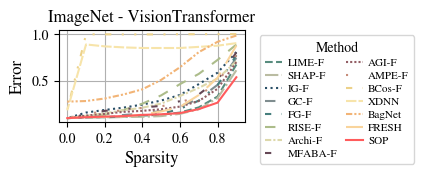

In [18]:
# Acc plot
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm

plt.rcParams.update({
    'font.size': 10,
    # 'font.family': [] #'Times New Roman'
})  # Set a default font size


name_mapping = {
    'lime_20': 'LIME-F',
    'shap_20': 'SHAP-F',
    'intgrad': 'IG-F',
    'gradcam': 'GC-F',
    'fullgrad': 'FG-F',
    'rise_20': 'RISE-F',
    'archipelago': 'Archi-F',
    'mfaba': 'MFABA-F',
    'agi': 'AGI-F',
    'ampe': 'AMPE-F',
    'bcos': 'BCos-F',
    'xdnn': 'XDNN',
    'bagnet': 'BagNet',
    'attn': 'FRESH',
    'sop': 'SOP',
}

# Data provided by the user
data = {key: results_all[key] for key in name_mapping}

# X-axis for the plot (assuming these are the points of interest or epochs)
# x = list(range(1, 11))
x = np.linspace(0.1, 1, 10)

colors_all = cm.get_cmap('tab20')  # The second argument specifies how many discrete colors to generate
# hatches_all = ['///', '\\\\\\', '---', '++++', 'xxxx', 'oo', 'OO', '...', '**', '\\\\\\...', '']
# hatches_all = ['///', '\\\\\\', '---', '++++', 'xxxx', 'oo','...', '**', '']

# # # Generate colors from the colormap
# colors = [colors_all(i) for i in range(len(name_mapping))]  # tab10.N is 10
# 0123 4567 89ab cdef
# colors = [
#     '#2222bb',
#     '#222277',
#     '#22bb22',
#     '#227722',
#     '#223322',
#     '#222233',
#     '#227777',
#     '#33bb22',
#     '#bb7722',
#     '#bb3322',
#     '#bb22bb',
#     '#332277',
#     '#777777',
#     '#333333',
#     '#ff0000',
# ]
colors = [
    '#588c7e',
    '#babca2',
    '#284e66',
    '#7f8d8f',
    '#467f7d',
    '#acbc8a',
    '#ddd8ab',
    '#654755',
    '#925e64',
    '#c68c7a',
    '#ecd189',
    '#f7e4aa',
    '#f2b476',
    '#f9d49c',
    '#ff5b5c'  #'#db6b5c'
]

# hatches = [hatches_all[i] for i in range(len(name_mapping))]

# Assigning different line styles to each line for better differentiation
# line_styles = ['--', '-.', ':', (0, (3, 5, 1, 5)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 10)), (0, (5, 5)), (0, (3, 10, 1, 10)), '-']
# line_styles = ['-'] * len(colors)
line_styles = [
    '--',                   # Dashed line
    '-.',                   # Dash-dot line
    ':',                    # Dotted line
    (0, (5, 10)),           # Long dashed line
    (0, (3, 5, 1, 5)),      # Dash-dot-dot line
    (0, (5, 5)),            # Densely dashed line
    (0, (3, 1, 1, 1)),      # Densely dash-dot line
    (0, (3, 10, 1, 10)),    # Loosely dash-dot line
    (0, (1, 1)),            # Densely dotted line
    (0, (1, 10)),           # Loosely dotted line
    (0, (3, 5, 1, 5, 1, 5)),  # Dash-dot-dot-dot line
    (0, (5, 1)),            # Densely dashed line (alternative)
    (0, (3, 1, 1, 1, 1, 1)),  # Densely dash-dot-dot line
    (0, (10, 5)),            # Loosely dashed line (alternative)
    '-',                    # Solid line
]

# Plotting with updated line styles
plt.figure(figsize=(2.4, 1.2))  # Adjusted for better visualization
for (key, values), style, color in zip(data.items(), line_styles, colors):
    # print(values)
    # print(list(range(len(values) - 1, -1, -1)))
    # print(list(values.values()))
    # print(key)
    plt.plot([1 - xi for xi in x], [1 - list(values.values())[i]['acc'] for i in range(len(values))], label=name_mapping[key], linestyle=style, color=color)

    # plt.plot(x, [1 - list(values.values())[i] for i in range(len(values) - 1, -1, -1)], label=name_mapping[key], linestyle=style, color=color)

plt.title('ImageNet - VisionTransformer')
plt.xlabel('Sparsity', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.xticks([0,0.2,0.4,0.6,0.8])
# plt.legend(loc='upper left', bbox_to_anchor=(0.5, -0.15), ncol=3)
legend = plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left',  ncol=2,
                   labelspacing=0.3, handlelength=1.5, handletextpad=0.5, fontsize=8, 
                   handleheight=0.5, borderpad=0.5, frameon=True, columnspacing=0.8)
# legend = plt.legend(title="Method", bbox_to_anchor=(-0.3, -0.5), loc='upper left',  ncol=4,
#                    labelspacing=0.3, handlelength=1.5, handletextpad=0.5, fontsize=8, 
#                    handleheight=0.5, borderpad=0.5, frameon=True, columnspacing=0.5)
# legend = ax.legend(
#     title="Method", 
#     bbox_to_anchor=(1.05, 1), 
#     loc='upper left',
#     labelspacing=0.3,  # Vertical spacing between legend items
#     handlelength=1,    # Length of the handles (line or marker length)
#     handletextpad=0.5, # Padding between handle and text
#     borderpad=0.5,     # Padding inside the legend border
#     ncol=2,            # Number of columns
#     frameon=True, 
#     fontsize=9, 
#     columnspacing=1  # Adjust this value to increase/decrease column distance
# )
# plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2,
#            labelspacing=0.2, handlelength=1, handletextpad=0.5, 
#            handleheight=0.5, borderpad=0.5)
plt.grid(True)
plt.savefig('imagenet_figs/acc_sparsity_imagenet.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [16]:
save_dir, results_path

('/shared_data0/weiqiuy/sop/results/sparsity/imagenet_s/',
 '/shared_data0/weiqiuy/sop/results/sparsity/imagenet_s//shap_20.pt')

In [17]:
data = torch.load(results_path)

In [18]:
data

{'acc': 0.5625,
 'corrects': [False,
  False,
  False,
  True,
  False,
  True,
  False,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  False]}